***This nootebook show how to use our  NEW metrics  build for the Cadence Note 2021: Classical variable stars in different Galactic environments: pulsation behaviour recovery (PI Musella).***

***LcContructor.py*** simulate the temporal series  of a pulsating star (RR, Cepheids or LPV, template from Marconi et al. 2005 and Trabucchi et al 2019) using a given distance, reddening and OpSim. (You can also choose to blend your star choising a  perc_blend which is the percentage of the mean flux of the variable itself that will add the the flux of each visit)

This metric  produce:

1)a file (cvs extension)with the temporal series and useful flags for the saturation(computed with saturation_stacker)  and  detection limit(s/n<5);

2)a figure with the simulated light curves in each band, phased with the period of the model.

A  preliminary and quick analysis of the temporal series is  performed using:

(1) ***LcPeriod.py*** derive the  period and the noise of Multiband periodogram  with MultibandLombscargle option of Gatspy(https://arxiv.org/abs/1502.01344) and build a figure that compare  Lombscargle in each filter with multiband analysis.  Compute differences between the true period and recovered period (also averaged on number of pulsational cycles)


(2)  ***LcFitting.py*** that  fit of phased light curve  with a given numberOfHarmonics. This metric also compute mean magnitude of the fit, amplitudes, chi  in each filter. Here  other possile FoM are the differences between the input and recoverd mean magnitudes, amplitudes. 


(3)***LcSampling.py*** that analize the sampling of the light curve.Compute the dimension of the max distance from two consecutive phases of the light curve in each band is also computed to analyze the sampling of the light curve. A possile FoM is the  number gaps larger than factorForDimensionGap*maxGapDimension.Two new measurements of the sampling was  introduced recently that use:

1)the uniformity parameter from  Barry F. Madore and Wendy L. Freedman 2005 ApJ 630 1054;

2)a modified version of	UniformityMetric by Peter Yoachim (https://sims-maf.lsst.io/_modules/lsst/sims/maf/metrics/cadenceMetrics.html#UniformityMetric.run). Calculate how uniformly the observations are spaced in phase (not time)using KS test.Returns a value between 0 (uniform sampling) and 1 . 

**For  more information please  read the details in each metric and/or please send an email to: 
marcella.dicriscienzo@inaf.it, silvio.leccia@inaf.it and vittorio.braga@inaf.it



In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from gatspy import periodic
import LcConstructor
import LcPeriod
import LcFitting
import LcSampling


/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:95: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName==self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName!=self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  (key is not 'bins') & (key is not 'binCol'):
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did yo

Version of db :FBS
Querying database SummaryAllProps with constraint night between 0 and 365 for columns ['fieldRA', 'numExposures', 'fiveSigmaDepth', 'skyBrightness', 'filter', 'observationStartMJD', 'fieldDec', 'seeingFwhmEff', 'visitExposureTime', 'night', 'airmass']
Found 229252 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
92 Observations total at this sky position (All SNR levels)
Theoretical amplitudes ugrizy
1.2227913167224784 1.333598341404219 0.982801835583583 0.7692672069731437 0.674921739228612 0.6788769764994846
Useful (at all S/N and NOT saturated)  Nvisits in ugrizy bands
7 7 16 19 18 25
Period of the model:
0.605520833333333


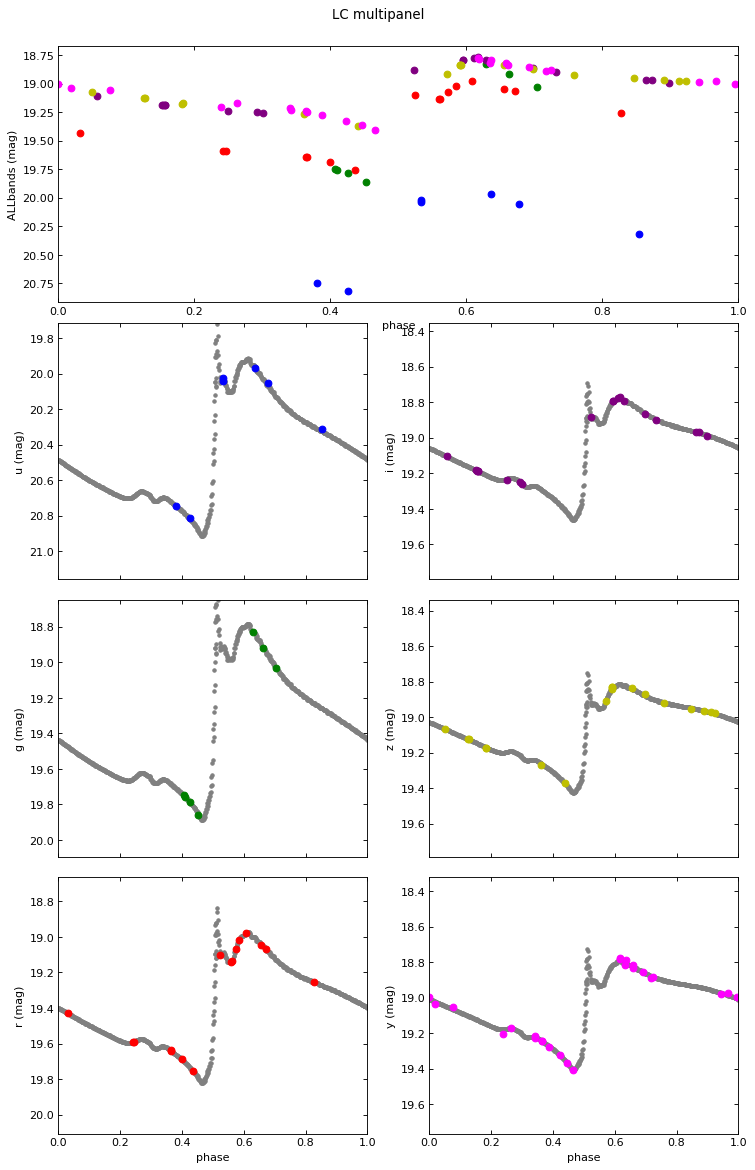

In [6]:
###################################################
#This cell show the use of LcContructor.py
###################################################
#Let's start!
#First let insert all the parameters:

#Insert Ra and Dec --->
ra=72.000005
dec=-70.933132

#Provo ad innserire il Bulge (coordinate BaadeWindow)--->
#ra=270.8839167
#dec=-30.0352667 


#Insert Distance modulus and E(B-V) of the target--->
#Bulge (distanza Mc namara et al 2000 e arrossamento BaadeWindow)
dm=18.5
ebv=0.08

#Insert Opsim (see in /sims_maf/ for all the available simulations)--->
#runName='baseline_v1.5_10yrs.db'
#path='/sims_maf/fbs_1.5/baseline/baseline_v1.5_10yrs.db'
runName='footprint_add_mag_cloudsv1.5_10yrs.db'
path='/sims_maf/fbs_1.5/footprints/footprint_add_mag_cloudsv1.5_10yrs.db'
#runName='bulges_bulge_wfd_v1.5_10yrs.db '
#path='/sims_maf/fbs_1.5/bulge/bulges_bulge_wfd_v1.5_10yrs.db'

#Insert start year and finish year of the survey--->
start=0
finish=1
#Insert the template of  variable star (Choose for example RRab.csv,RRc.csv,CEF1.csv,CEF2.csv,LPV1.csv,LPV2.csv)--->
path_ID='./'
modelName='RRab'
modelFileName=modelName+'.csv'
path2=path_ID+modelFileName

#Insert the sigma for the noising--->
sigma_noise=1

#Insert path where figure will be stored if figure=True  (build the directory first)--->
path3='FIGURE/'
figure=True
#Insert path where sciifiles will be stored if ascii=True  (build the directory first--->
path4='FILES/'
optionFile=True

#If this parameter is true the saturated points will be eliminated in the plot (don't change!)
do_remove_saturated=True

# Choose your blending in each filter(perc_blend* meanflux_filter is the flux added to flux of each visit), 
# put perc_blend=0 if thare is no blending of the stellar image with other close stars
perc_blend=[0,0,0,0,0,0]

label=str(modelName)+'_'+('ra{0:06.2f}dec{1:+06.2f}dm'.format(ra,dec))+str(dm)+'ebv'+str(ebv)+'y'+str(start)+'y'+str(finish)+'_'+str(runName)

#Use LcConstructor.py 
LcTeoLSST,LcTeoLSST_noised,LcTheoric,mv,index_notsaturated=LcConstructor.main(ra,dec,dm,ebv,runName,path,start,finish,path2,sigma_noise,path3,figure,path4,optionFile,modelName,do_remove_saturated,label,perc_blend)
period_model=LcTeoLSST['period']
print('Period of the model:' )
print(period_model)

In [7]:
###################################################
#This cell shows the use of LcSampling.py
####################################################Timport LcSampling
factorForDimensionGap=0.5
finalResult=LcSampling.main(LcTeoLSST_noised,period_model,index_notsaturated,factorForDimensionGap)
print('Number of observations  (All SNR levels and not saturated)=')
print(finalResult['n_u'],finalResult['n_g'],finalResult['n_r'],finalResult['n_i'],finalResult['n_z'],finalResult['n_y'])
print('Max gap dimension (MGD)=')
print(finalResult['maxGap_u'],finalResult['maxGap_g'],finalResult['maxGap_r'],finalResult['maxGap_i'],finalResult['maxGap_z'],finalResult['maxGap_y'])
print('Number of gaps >'+ str(factorForDimensionGap)+'MGD =')
print(finalResult['numberGaps_u'],finalResult['numberGaps_g'],finalResult['numberGaps_r'],finalResult['numberGaps_i'],finalResult['numberGaps_z'],finalResult['numberGaps_y'])
print('Uniformity parameter ( from Madore, Freedman 2005. 999.0 if number of epochs >= 20)  =')
print(finalResult['uniformity_u'],finalResult['uniformity_g'],finalResult['uniformity_r'],finalResult['uniformity_i'],finalResult['uniformity_z'],finalResult['uniformity_y'])
print('Uniformity parameter ( from  UniformityMetric)  =')
print(finalResult['uniformityKS_u'],finalResult['uniformityKS_g'],finalResult['uniformityKS_r'],finalResult['uniformityKS_i'],finalResult['uniformityKS_z'],finalResult['uniformityKS_y'])

Number of observations  (All SNR levels and not saturated)=
7 7 16 19 18 25
Max gap dimension (MGD)=
0.5253854451742868 0.7026136395124576 0.21111127937788865 0.22245233458203728 0.17852425897028112 0.21793793328943423
Number of gaps >0.5MGD =
1 1 3 3 2 3
Uniformity parameter ( from Madore, Freedman 2005. 999.0 if number of epochs >= 20)  =
0.7912325964168028 0.5517278537030069 0.9622968676184859 0.9243500016656486 0.9864034245093038 999.0
Uniformity parameter ( from  UniformityMetric)  =
0.4270855230240491 0.4168993537981719 0.297119096306492 0.189330200376307 0.17852425897028112 0.13368066763333958


/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/gatspy/periodic/lomb_scargle_fast.py:445: UserWarning: The score() method defaults to a slower O[N^2] algorithm.
Use the score_frequency_grid() method to access the fast FFT-based algorithm.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("The score() method defaults to a slower O[N^2] "


Noise level (median vs mean)
0.11980533549018389 0.16126125460162422
Finding optimal frequency:
 - Estimated peak width = 0.03
 - Using 5 steps per peak; omega_step = 0.00599
 - User-specified period range:  0.3 to 0.91
 - Computing periods at 2310 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
 Period of the model:
0.605520833333333
 Period found by Gatpy:
0.3768376895216133
 DeltaP/P (in perc):
-0.22868314381171967
 DeltaP/P*1/number of cycle:
0.0010906839493813026


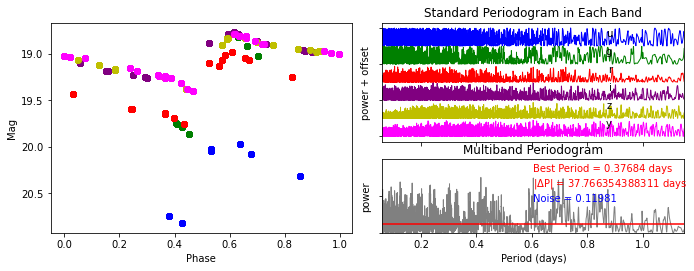

In [5]:
###################################################
#This cell shows the use of LcPeriod.py
####################################################T


#period range in the periodogram for the plot of the periodogram 
minper_plot=period_model-0.9*period_model
maxper_plot=period_model+ 0.9*period_model
#Step's choice
periods = np.linspace(minper_plot, maxper_plot,10000)
#period range for the optimization of the period's search with LombScargleMultiband
minper_opt=period_model- 0.5*period_model
maxper_opt=period_model+0.5*period_model


#Use Lcfitting.py
best_per_temp,diffper,diffper_abs=LcPeriod.main(mv,LcTeoLSST,LcTeoLSST_noised,
            index_notsaturated,label,path3)



fitting...
fitting u band
fitting g band
fitting r band
fitting i band
fitting z band
fitting y band
Final results:
<u>,<g>,<r>,<i>,<z>,<y>,=
19.65678993968956 18.586198372942434 18.607092440402084 18.308600294949578 18.29848777636559 18.280140860704474
<Au>,<Ag>,<Ar>,<Ai>,<Az>,<Ay>,=
0.5997834730091931 0.5617870077962799 0.4289629623417639 0.34514777402484853 0.32974779530063003 0.3112306269569096
Chi of the fit with 0.5
1.488054647875143e-05 1.0663300716987405e-05 1.5726834502668317e-05 7.086310801901212e-06 1.2211913350928177e-05 1.608808074200869e-05


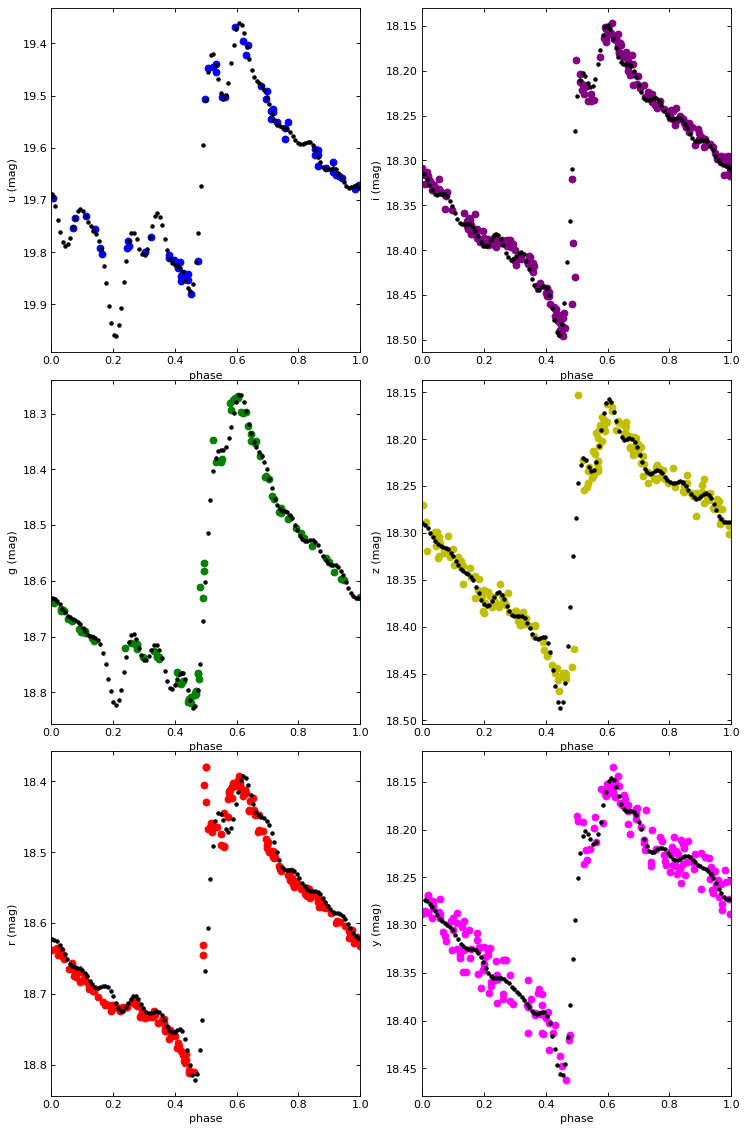

In [10]:
###################################################
#This cell  shows the use of LcFitting.py
####################################################T

#This is the period that will  phase the light curve
period=best_per_temp #or period_model

#Insert the number of harmonics of the model's fit (if NVisits =2*numberOfHarmonics+2 the metric skip to other band without doing  the fit)
numberOfHarmonics=12
#The  value that multiplyes the max distance from two consecutive phases of the light curve (used to count the gaps in  the LC)
factorForDimensionGap=0.5 

outDir=path3


#Use of LcFitting!
finalResult=LcFitting.computation(LcTeoLSST_noised,index_notsaturated,period,numberOfHarmonics,factorForDimensionGap,label,outDir)

#...and is useful to have all these information!!
print('Final results:')
print('<u>,<g>,<r>,<i>,<z>,<y>,=')
print(finalResult['mean_u'],finalResult['mean_g'],finalResult['mean_r'],finalResult['mean_i'],finalResult['mean_z'],finalResult['mean_y'])
print('<Au>,<Ag>,<Ar>,<Ai>,<Az>,<Ay>,=')
print(finalResult['ampl_u'],finalResult['ampl_g'],finalResult['ampl_r'],finalResult['ampl_i'],finalResult['ampl_z'],finalResult['ampl_y'])
print('Chi of the fit with '+ str(factorForDimensionGap))
print(finalResult['chi_u'],finalResult['chi_g'],finalResult['chi_r'],finalResult['chi_i'],finalResult['chi_z'],finalResult['chi_y'])
